<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM451/Virial_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virial Equation



In [6]:
from sympy import diff, integrate, solve, Eq, symbols, Symbol, init_printing # we can import all of sympy but these are enough
from sympy.plotting import plot
init_printing()

In [70]:
p,V,T,pc,Vc,Tc=symbols("p,V_m,T,p_c,V_c,T_c",positive=True, real=True) # Setup variables
R,a,b=symbols("R, a, b", positive=True,real=True,constant=True) # Setup constants
#R_cm=R*1000/100

In [39]:
A,B,C,D=[1,-.00064,0,0]
A,B,C,D=[1,-.00648,0.00020,-.00007]
A,B,C,D=[1,-.06759,0.02127,-0.00036]
#A,B,C,D=[1,-.38404,0.08788,0.37232]

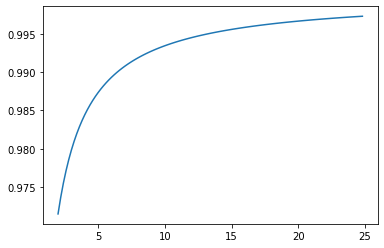

In [40]:
import matplotlib.pyplot as plt
from numpy import arange
V=[v for v in arange(2,25,.2)]
Z=[A+B/V+C/V**2+D/V**3 for V in V]
plt.plot(V,Z)
plt.show()

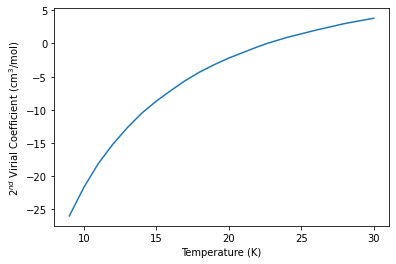

In [56]:
#Helium data from https://web.mit.edu/8.13/8.13c/references-fall/aip/aip-handbook-section4i.pdf
T=[t for t in range(9,23) if t!=21]+[22.64]+[t for t in range(24,31,2)]
B=[-26,-21.7,-18.1,-15.2,-12.7,-10.5,-8.7,-7.1,-5.6,-4.3,-3.2,-2.2,-0.5,0,.9,2,3,3.8]
plt.plot(T,B)
plt.xlabel('Temperature (K)')
plt.ylabel('2$^{nd}$ Virial Coefficient (cm$^3$/mol)')
plt.show()

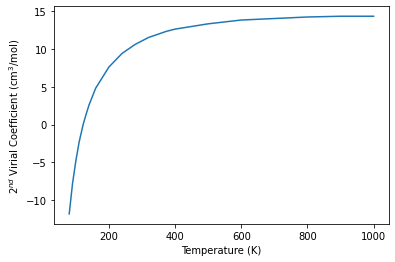

In [48]:
#Neon data from https://web.mit.edu/8.13/8.13c/references-fall/aip/aip-handbook-section4i.pdf
T=[80,90,100,110,120,122.11,130,140,160,200,240,273.15,280,320,360,373.15,400,500,600,700,800,900,1000]
B=[-11.8,-7.8,-4.8,-2.3,-0.4,0,1.2,2.6,4.8,7.6,9.4,10.4,10.6,11.5,12.1,12.3,12.6,13.3,13.8,14,14.2,14.3,14.3]
plt.plot(T,B)
plt.xlabel('Temperature (K)')
plt.ylabel('2$^{nd}$ Virial Coefficient (cm$^3$/mol)')
plt.show()

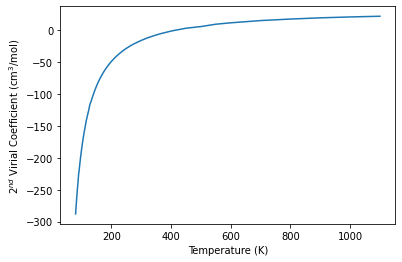

In [68]:
#Argon data from https://web.mit.edu/8.13/8.13c/references-fall/aip/aip-handbook-section4i.pdf
T=[t for t in range(80,121,2)]+[t for t in range(124,181,4)]+[t for t in range(190,261,10)]+[273.15]+[t for t in range(280,370,20)]+[373.15,380,400,411.52,450,500,550]+[t for t in range(600,1150,100)]
B=[-288,-274.2,-261.4,-249.7,-238.7,-226.6,-219.1,-210.3,-202.0,-194.3,-187.0,-180.2,-173.8,-167.7,-161.9,-156.5,-151.3,-146.4,-141,-137.3,-133.1,-125.2,-116.0,-111.4,-105.4,-99.8,-94.6,-89.8,-85.3,-81.1,-77.2,-73.5,-70.1
   ,-66.9,-63.8,-60.9,-54.4,-48.7,-43.7,-39.2,-35.2,-31.5,-28.2,-25.3,-21.7,-20.1,-15.7,-11.9,-8.7,-5.8,-4.2,-3.4,-1.1,0,3.4,6,9.7,11.9,15.4,17.8,19.7,21.1,22.2]
plt.plot(T,B)
plt.xlabel('Temperature (K)')
plt.ylabel('2$^{nd}$ Virial Coefficient (cm$^3$/mol)')
plt.show()

# Connecting vdw and Virial Equations
If both equations are supposed to model the real world, there must be connections between the vdw $a$ and $b$ parameters and the virial coefficients. Let's see if we can find them. Start with the vdw equation. 



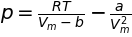

In [130]:
eos=Eq(p,R*T/(V-b)-a/V**2) # vdw equation
display(eos)

If we factor a V out of the denominator of the first term we end up with a $\dfrac{1}{1-\frac{b}{V}}$ term. The denominator, for conditions that aren't too exotic is a number very close to 1 (which is a way to say that b/V is small). If this is the case, we can substitute that expression for $1+b/V+(b/V)^2$...

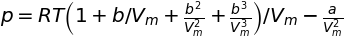

In [134]:
p_approx=Eq(p,eos.rhs.subs(1/(V-b),1/V*(1+(b/V)+(b/V)**2+(b/V)**3))) # factor out a V
display(p_approx)

Here we'll trucate the series after the fourth term. Usually that's way more than enough terms to get reasonably good results. And that's two more than we need here to get a connection to the second virial coefficient.

Now the pressure expression we have can be turned in to the compression factor by multiplying both sides by $\frac{V}{RT}$.


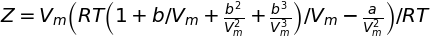

In [150]:
Z=symbols('Z')
Z_eq=Eq(Z,p_approx.rhs*V/(R*T)) 
display(Z_eq)

That looks complicated but it's clear that somethings cancel out. So simplify it.

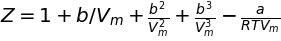

In [151]:
Z_eq=Z_eq.simplify() # store the simplified version under the same label.
display(Z_eq)

Now collect terms with similar powers of 1/V.

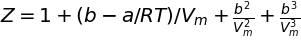

In [152]:
Eq(Z,collect(Z_eq.rhs,(1/V))) # to collect like terms, we need to deal with only one side of the equation. But we can use Eq(Z,...) to make and equation again from the results of collect.

The coeffient of the 1/V term is our second virial coefficient here written in terms of vdw parameters.